# TF-IDF
this notebook contains 

* how to calculate Term Frequency, Inverse Document Frequency
and Term Frequency-Inverse Document Frequency weights.
* how to measure the cosine similarity between two TF-IDF
vectors

### What is TF-IDF ?
TF-IDF stands for **Term Frequency-Inverse Document frequency**.  
  

The TF-IDF method aims to reflect how important and informative a word
is to a document in a corpus. This is achieved by scaling down the impact
of most occurring, and hence less informative, tokens in a given corpus.  

The tf–idf value increases with every occurrence of a word in a document
but decreases when this word appears in other documents in the corpus.  

Thus, the TF-IDF method aims to define how important a word is for a
document by considering the number of times it occurs in a document as
well as its relation to the number of times the same word occurs in other
documents in the corpus.


### Terminology

● w— given word (term) in a document. 

● d — a given document from the entire corpus. 

● N — number of documents we have in the corpus. 

● corpus — the total document set. 

**Term Frequency (TF)**

Term Frequency refers to the number of occurrences of a particular term **t** in a
document **d** divided by the total number of terms in that document.  

Tf (t,d) = (Number of times term t appears in a document d) / (Total number of
terms in the document)

In [3]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# document 0 = 'The cats eat fish'
# document 1 = 'Leo catches fish every day',
# document 2 = 'Once a day I eat fish'

corpus = ['The cats eat fish',
'Leo catches fish every day',
'Once a day I eat fish'
]


In [5]:
#create the object cv to create an instance of the class CountVectorizer
cv=CountVectorizer() 

# calculate word counts in corpus using the .fit_transform ( ) method
word_count_vector=cv.fit_transform(corpus) 

#return a list of feature names sorted by their indices using .get_feature_names_out ( )
tokens = cv.get_feature_names_out() 

print(word_count_vector.shape) # print the shape of the matrix (rows and columns)
print(tokens)
print(len(tokens))
print(word_count_vector.toarray())

(3, 9)
['catches' 'cats' 'day' 'eat' 'every' 'fish' 'leo' 'once' 'the']
9
[[0 1 0 1 0 1 0 0 1]
 [1 0 1 0 1 1 1 0 0]
 [0 0 1 1 0 1 0 1 0]]


### word count in a data frame 

In [6]:
doc_names = ['Doc{:d}'.format(index) for index, _ in enumerate(word_count_vector)]
#return the iterable object word_count_vector as an enumerate object with the enumerate() function
#for loop: iterate over the enumerate object word_count_vector
#format the specified values (index) and insert them inside the placeholder { }
#Doc = (doc0, doc1, doc2)
#{:d}: format code expecting integers (= word counts)
df = pd.DataFrame(data=word_count_vector.toarray(), index=doc_names, columns=tokens) # create the data frame
df

,catches,cats,day,eat,every,fish,leo,once,the
Doc0,0,1,0,1,0,1,0,0,1
Doc1,1,0,1,0,1,1,1,0,0
Doc2,0,0,1,1,0,1,0,1,0


### calculate term frequency

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
# create the object tfidf_vectorizer to create an instance of the class TfidfVectorizer
#sum of absolute values of vector elements is 1

X = tfidf_vectorizer.fit_transform(corpus) # call the method .fit_transform( ) on the object tfidf_vectorizer and pass corpus to the function

df = pd.DataFrame(X.toarray(), index=doc_names, columns=tfidf_vectorizer.get_feature_names_out())
df

,catches,cats,day,eat,every,fish,leo,once,the
Doc0,0.0,0.25,0.00,0.25,0.0,0.25,0.0,0.00,0.25
Doc1,0.2,0.00,0.20,0.00,0.2,0.20,0.2,0.00,0.00
Doc2,0.0,0.00,0.25,0.25,0.0,0.25,0.0,0.25,0.00


**Inverse Document Frequency (IDF)**  

Inverse Document Frequency (IDF) is a measure we use to find out which terms
are important and informative. In particular, IDF diminishes the weight of
terms that occur very frequently in a document set and increases the weight of
terms that occur rarely, thus the IDF value will be low for most occurring
terms.  

Inverse Document Frequency is calculated as the total number of documents in the corpus divided by the number of documents containing the term.  

IDF (term) = log ((number of documents + 1)/ (number of documents containing the term*)) + 1  


*document frequency (DF) is the number of documents in which the term is present.  

df(t) = occurrence of t in documents


In [9]:
# method1. TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])
df_idf

,idf_weights
catches,1.693147
cats,1.693147
day,1.287682
eat,1.287682
every,1.693147
fish,1.000000
leo,1.693147
once,1.693147
the,1.693147


In [10]:
# method1. TfidfVectorizer
tf = TfidfVectorizer(use_idf=True)
tf.fit_transform(corpus)
idf = tf.idf_
idf
df_idf = pd.DataFrame(idf, index=cv.get_feature_names_out(),columns=["idf_weights"])
df_idf

,idf_weights
catches,1.693147
cats,1.693147
day,1.287682
eat,1.287682
every,1.693147
fish,1.000000
leo,1.693147
once,1.693147
the,1.693147


**TF-IDF Term Frequency-Inverse Document Frequency**  
tf-idf = tf(w, d) * idf (w, D)

In [44]:
corpus = ['The cats eat fish',
'Leo catches fish every day',
'Once a day I eat fish'
]

count_vector=cv.transform(corpus)
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [45]:
# TF-IDF with TfidfTransformer- FIRST DOCUMENT
first_document_vector=tf_idf_vector[0]
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)
df

,tf-idf
all,0.0
close,0.0
colleagues,0.0
communicates,0.0
has,0.0
his,0.0
nicely,0.0
president,0.0
relationship,0.0
staff,0.0


In [46]:
# TF-IDF with TfidfTransformer- SECOND DOCUMENT
second_document_vector=tf_idf_vector[1]
df = pd.DataFrame(second_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)
df

,tf-idf
all,0.0
close,0.0
colleagues,0.0
communicates,0.0
has,0.0
his,0.0
nicely,0.0
president,0.0
relationship,0.0
staff,0.0


In [47]:
#TF-IDF with TfidfTransformer- THIRD DOCUMENT
third_document_vector=tf_idf_vector[2]
df = pd.DataFrame(third_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)
df

,tf-idf
all,0.0
close,0.0
colleagues,0.0
communicates,0.0
has,0.0
his,0.0
nicely,0.0
president,0.0
relationship,0.0
staff,0.0


Exercise : Apply text preprocessing (noise removal & normalisation) techniques in the following text and calculate the TF-IDF values.

In [15]:
text1 = "So many people will be trying to leave at the same time, there will not be flights, the roads will be blocked, are you going to be able to get fuel for your car, your passport, is there going to be cash in the banking machines?"
text2 = "Now some people have arrived, but they need to provide proof of his British citizenship to get an emergency travel document, a more urgent alternative to a passport."
text3 = "If we take the advice at face value, it means the UK and also the US government are worried that Russian action is imminent - that makes everybody want to take their passport and get out."

In [23]:
import nltk
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
def clean_text(text1):
  #remove punctuation
  text1 = ''.join(c for c in text1 if c not in string.punctuation)
  #tokenize the text
  text1= word_tokenize(text1)
  #remove stopwords
  text1 = [word for word in text1 if not word in stopwords.words("english")]
  # Lemmatize the words
  lemma = WordNetLemmatizer()
  text1 = [lemma.lemmatize(word) for word in text1]
  text1 = ' '.join(text1)
  return text1


In [24]:
corpus = [clean_text(text1), clean_text(text2), clean_text(text3)]

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


In [25]:
cv=CountVectorizer() #create the object cv to create an instance of the class CountVectorizer
word_count_vector=cv.fit_transform(corpus) # calculate word counts in corpus using the .fit_transform ( ) method
tokens = cv.get_feature_names_out() #return a list of feature names sorted by their indices using .get_feature_names_out ( ) method

print(word_count_vector.shape) #print the shape of the matrix (rows and columns)
print(tokens)
print(len(tokens))
print(word_count_vector.toarray())

(3, 47)
['able' 'action' 'advice' 'also' 'alternative' 'arrived' 'banking'
 'blocked' 'british' 'car' 'cash' 'citizenship' 'document' 'emergency'
 'everybody' 'face' 'flight' 'fuel' 'get' 'going' 'government' 'if'
 'imminent' 'leave' 'machine' 'make' 'many' 'mean' 'need' 'now' 'passport'
 'people' 'proof' 'provide' 'road' 'russian' 'so' 'take' 'time' 'travel'
 'trying' 'uk' 'urgent' 'us' 'value' 'want' 'worried']
47
[[1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 2 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0
  1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
  0 0 0 1 0 0 1 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1
  0 2 0 0 0 1 0 1 1 1 1]]


In [26]:
doc_names = ['Doc{:d}'.format(index) for index, _ in enumerate(word_count_vector)]
#return the iterable object word_count_vector as an enumerate object with the enumerate() function
#for loop: iterate over the enumerate object word_count_vector
#format the specified values (index) and insert them inside the placeholder { }
#Doc = (doc0, doc1, doc2)
#{:d}: format code expecting integers (= word counts)
df = pd.DataFrame(data=word_count_vector.toarray(), index=doc_names, columns=tokens) # create the data frame
df

,able,action,advice,also,alternative,arrived,banking,blocked,british,car,...,take,time,travel,trying,uk,urgent,us,value,want,worried
Doc0,1,0,0,0,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,0
Doc1,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
Doc2,0,1,1,1,0,0,0,0,0,0,...,2,0,0,0,1,0,1,1,1,1


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from the module sklearn.feature_extraction.text import the class TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
# create the object tfidf_vectorizer to create an instance of the class TfidfVectorizer
#sum of absolute values of vector elements is 1
X = tfidf_vectorizer.fit_transform(corpus) # call the method .fit_transform( ) on the object tfidf_vectorizer
df = pd.DataFrame(X.toarray(), index=doc_names, columns=tfidf_vectorizer.get_feature_names_out())
# create the data frame
df

,able,action,advice,also,alternative,arrived,banking,blocked,british,car,...,take,time,travel,trying,uk,urgent,us,value,want,worried
Doc0,0.052632,0.00,0.00,0.00,0.000000,0.000000,0.052632,0.052632,0.000000,0.052632,...,0.0,0.052632,0.000000,0.052632,0.00,0.000000,0.00,0.00,0.00,0.00
Doc1,0.000000,0.00,0.00,0.00,0.066667,0.066667,0.000000,0.000000,0.066667,0.000000,...,0.0,0.000000,0.066667,0.000000,0.00,0.066667,0.00,0.00,0.00,0.00
Doc2,0.000000,0.05,0.05,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.1,0.000000,0.000000,0.000000,0.05,0.000000,0.05,0.05,0.05,0.05


In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])
df_idf

In [ ]:
count_vector=cv.transform(corpus)
tf_idf_vector=tfidf_transformer.transform(count_vector)
first_document_vector=tf_idf_vector[0]
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens,
columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

In [ ]:
second_document_vector=tf_idf_vector[1]
df = pd.DataFrame(second_document_vector.T.todense(), index=tokens,
columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

In [ ]:
third_document_vector=tf_idf_vector[2]
df = pd.DataFrame(third_document_vector.T.todense(), index=tokens,
columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

### Cosine Similarity between two TF-IDF vectors
measure the cosine similarity between two TF-IDF vectors, Vector A and Vector B.

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
text1 = 'The President communicates nicely with all his colleagues'
text2 = 'The President has a very close relationship with the staff'
corpus = [text1, text2]
cv=CountVectorizer()
word_count_vector=cv.fit_transform(corpus)
tokens = cv.get_feature_names_out()
print(word_count_vector.shape)
print(tokens)
print(len(tokens))
print(word_count_vector.toarray())

doc_names = ['Doc{:d}'.format(index) for index, _ in enumerate(word_count_vector)]
df = pd.DataFrame(data=word_count_vector.toarray(), index=doc_names, columns=tokens) # create the data frame
df

(2, 13)
['all' 'close' 'colleagues' 'communicates' 'has' 'his' 'nicely'
 'president' 'relationship' 'staff' 'the' 'very' 'with']
13
[[1 0 1 1 0 1 1 1 0 0 1 0 1]
 [0 1 0 0 1 0 0 1 1 1 2 1 1]]


,all,close,colleagues,communicates,has,his,nicely,president,relationship,staff,the,very,with
Doc0,1,0,1,1,0,1,1,1,0,0,1,0,1
Doc1,0,1,0,0,1,0,0,1,1,1,2,1,1


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(corpus) # call the method .fit_transform( ) on the object tfidf_vectorizer
df = pd.DataFrame(X.toarray(), index=doc_names, columns=tfidf_vectorizer.get_feature_names_out())
df

,all,close,colleagues,communicates,has,his,nicely,president,relationship,staff,the,very,with
Doc0,0.125,0.000000,0.125,0.125,0.000000,0.125,0.125,0.125000,0.000000,0.000000,0.125000,0.000000,0.125000
Doc1,0.000,0.111111,0.000,0.000,0.111111,0.000,0.000,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111


In [30]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])
df_idf

,idf_weights
all,1.405465
close,1.405465
colleagues,1.405465
communicates,1.405465
has,1.405465
his,1.405465
nicely,1.405465
president,1.000000
relationship,1.405465
staff,1.405465


In [31]:
count_vector=cv.transform(corpus)
tf_idf_vector=tfidf_transformer.transform(count_vector)
first_document_vector=tf_idf_vector[0]
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
all,0.391668
colleagues,0.391668
communicates,0.391668
his,0.391668
nicely,0.391668
president,0.278675
the,0.278675
with,0.278675
close,0.000000
has,0.000000


In [32]:
count_vector=cv.transform(corpus)
tf_idf_vector=tfidf_transformer.transform(count_vector)
second_document_vector=tf_idf_vector[1]
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
all,0.391668
colleagues,0.391668
communicates,0.391668
his,0.391668
nicely,0.391668
president,0.278675
the,0.278675
with,0.278675
close,0.000000
has,0.000000


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text_db = ['The President communicates nicely with all his colleagues',
'The President has a very close relationship with the staff']
vec = TfidfVectorizer()
tf_idf = vec.fit_transform(text_db)
print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names_out()))

        all     close  colleagues  communicates       has       his    nicely  \
0  0.391668  0.000000    0.391668      0.391668  0.000000  0.391668  0.391668   
1  0.000000  0.352728    0.000000      0.000000  0.352728  0.000000  0.000000   

   president  relationship     staff       the      very      with  
0   0.278675      0.000000  0.000000  0.278675  0.000000  0.278675  
1   0.250969      0.352728  0.352728  0.501938  0.352728  0.250969  


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tf_idf, tf_idf)
print(cosine_sim)

[[1.         0.27975559]
 [0.27975559 1.        ]]


In [35]:
import plotly.express as px
z = [[1, 0.27975559],
[0.27975559, 1 ]]
fig = px.imshow(z, text_auto=True, labels=dict(x="Cosine similarity", y="Text", color="Productivity"),
x=['text1', 'text2'],
y=['text1', 'text2'])
fig.show()

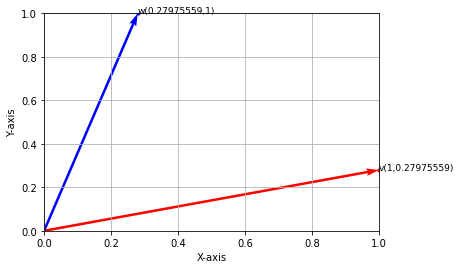

In [37]:
import numpy as np
import matplotlib.pyplot as plt

v = [1, 0.27975559]
w = [0.27975559, 1 ]
array = np.array([[0, 0, v[0], v[1]],
[0, 0, w[0], w[1]]])
X, Y, V, W = zip(*array)
plt.figure()
plt.ylabel('Y-axis')
plt.xlabel('X-axis')

ax = plt.gca()
ax.annotate(f'v({v[0]},{v[1]})', (v[0],v[1]),fontsize=9)
plt.scatter(v[0],v[1], s=10,c='red')
ax.annotate(f'w({w[0]},{w[1]})', (w[0],w[1]),fontsize=9)
plt.scatter(w[0], w[1], s=10,c='blue')
ax.quiver(X, Y, V, W, angles='xy', scale_units='xy',color=['r','b'],scale=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.grid()
plt.draw()
plt.show()

In [40]:
import math
math.cos(0.27975559) # in radians
0.9611229536892412
degrees = math.degrees(0.9611229536892412)
degrees


55.0682888395412